In [ ]:
import pandas as pd
import plotnine as plt
import matplotlib.pyplot as matplot
import numpy as np
from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

In [ ]:
def printsensor(numberitem):
  airdata = open('sensor'+numberitem+'_air.txt').read().splitlines()
  air_wavelength = []
  air_signal = []
  for line in airdata:
    line = line.split(',')
    air_wavelength.append(float(line[0]))
    air_signal.append(float(line[1]))

  izopropdata = open('sensor'+numberitem+'_izopropanol.txt').read().splitlines()
  izoprop_wavelength = []
  izoprop_signal = []
  for line in izopropdata:
    line = line.split(',')
    izoprop_wavelength.append(float(line[0]))
    izoprop_signal.append(float(line[1]))
    
  waterdata = open('sensor'+numberitem+'_water.txt').read().splitlines()
  water_wavelength = []
  water_signal = []
  for line in waterdata:
    line = line.split(',')
    water_wavelength.append(float(line[0]))
    water_signal.append(float(line[1]))

  framedict = {'wavelength_air':air_wavelength,'signal_air':air_signal,'wavelength_izopropanol':izoprop_wavelength,'signal_izopropanol':izoprop_signal,'wavelength_water':water_wavelength,'signal_water':water_signal}
  frame = pd.DataFrame(framedict)
  frame['air-water'] = frame['signal_air'] - frame['signal_water']
  frame['air-izopropanol'] = frame['signal_air'] - frame['signal_izopropanol']
  
  #plot = plt.ggplot(frame)+\
  #plt.geom_line(plt.aes(x='wavelength_air',y='signal_air'),color='green')+\
  #plt.geom_line(plt.aes(x='wavelength_izopropanol',y='signal_izopropanol'),color='yellow')+\
  #plt.geom_line(plt.aes(x='wavelength_water',y='signal_water'),color='blue')+\
  #plt.ggtitle(numberitem)
  #plot.draw()

  return frame
sensornums = ['01','02','03','04','05','06','07','08','09','10']
totalframe = pd.DataFrame()
for sensor in sensornums:
  frame = printsensor(sensor)
  columns = list(frame.columns)
  renamer = {}
  for column in columns:
    renamer[column] = column+"_"+sensor
  frame = frame.rename(renamer,axis=1)
  totalframe =pd.concat([totalframe,frame],axis=1)

totalframe = totalframe[['wavelength_air_01', 'signal_air_01','signal_izopropanol_01','signal_water_01','signal_air_02','signal_izopropanol_02','signal_water_02','signal_air_03','signal_izopropanol_03','signal_water_03',\
'signal_air_04','signal_izopropanol_04','signal_water_04','signal_air_05','signal_izopropanol_05','signal_water_05','signal_air_06','signal_izopropanol_06','signal_water_06','signal_air_07','signal_izopropanol_07',\
'signal_water_07','signal_air_08','signal_izopropanol_08','signal_water_08','signal_air_09','signal_izopropanol_09','signal_water_09','signal_air_10','signal_izopropanol_10','signal_water_10']]
totalframe = totalframe.rename({'wavelength_air_01':'wavelength'},axis=1)

print(totalframe.columns)
totalframe.to_csv('collected_data.csv',sep=',',index=False)



Index(['wavelength', 'signal_air_01', 'signal_izopropanol_01',
       'signal_water_01', 'signal_air_02', 'signal_izopropanol_02',
       'signal_water_02', 'signal_air_03', 'signal_izopropanol_03',
       'signal_water_03', 'signal_air_04', 'signal_izopropanol_04',
       'signal_water_04', 'signal_air_05', 'signal_izopropanol_05',
       'signal_water_05', 'signal_air_06', 'signal_izopropanol_06',
       'signal_water_06', 'signal_air_07', 'signal_izopropanol_07',
       'signal_water_07', 'signal_air_08', 'signal_izopropanol_08',
       'signal_water_08', 'signal_air_09', 'signal_izopropanol_09',
       'signal_water_09', 'signal_air_10', 'signal_izopropanol_10',
       'signal_water_10'],
      dtype='object')


In [ ]:
def filter_s(series):
  series = np.array(series).transpose()
  series = savgol_filter(series,150,3)
  series = pd.Series(series.transpose())
  return series

signals = ['signal_air_01','signal_izopropanol_01','signal_water_01','signal_air_02','signal_izopropanol_02','signal_water_02','signal_air_03','signal_izopropanol_03','signal_water_03',\
'signal_air_04','signal_izopropanol_04','signal_water_04','signal_air_05','signal_izopropanol_05','signal_water_05','signal_air_06','signal_izopropanol_06','signal_water_06','signal_air_07','signal_izopropanol_07',\
'signal_water_07','signal_air_08','signal_izopropanol_08','signal_water_08','signal_air_09','signal_izopropanol_09','signal_water_09','signal_air_10','signal_izopropanol_10','signal_water_10']

for signal in signals:
  totalframe[signal+'filtered'] = filter_s(totalframe[signal])

filtered_signals = [x+'_filtered' for x in signals]
totalframe.to_csv('collected_filtered_data.csv')

In [ ]:
def find_minimums(frame,signals):
    def find_min(series,wavelengths):
      series = np.array(series).transpose()
      minimum = np.argmin(series)
      signal = series[minimum]
      wavelength = wavelengths[minimum]
      return [wavelength,signal]

    wavelenghts_arr = np.array(frame['wavelength'])
    minimums = {}
    i=0
    for signal in signals:
      minimum = find_min(frame[signal],wavelenghts_arr)
      minimums[i] = minimum
      i+=1

    return minimums
print([x for x in list(totalframe.columns) if 'filtered' in x])
minimums_air = find_minimums(totalframe,['signal_air_01filtered', 'signal_air_02filtered','signal_air_03filtered','signal_air_04filtered','signal_air_05filtered','signal_air_06filtered','signal_air_07filtered','signal_air_08filtered','signal_air_09filtered','signal_air_10filtered'])
minimums_water = find_minimums(totalframe,['signal_water_01filtered', 'signal_water_02filtered','signal_water_03filtered','signal_water_04filtered','signal_water_05filtered','signal_water_06filtered','signal_water_07filtered','signal_water_08filtered','signal_water_09filtered','signal_water_10filtered'])
minimums_izopropanol = find_minimums(totalframe,['signal_izopropanol_01filtered', 'signal_izopropanol_02filtered','signal_izopropanol_03filtered','signal_izopropanol_04filtered','signal_izopropanol_05filtered','signal_izopropanol_06filtered','signal_izopropanol_07filtered','signal_izopropanol_08filtered','signal_izopropanol_09filtered','signal_izopropanol_10filtered'])

air_x = np.array([minimums_air[x][0]for x in range(10)]).reshape((-1, 1))
water_y = np.array([minimums_water[x][0]for x in range(10)])
izopropanol_y = np.array([minimums_izopropanol[x][0]for x in range(10)])
model_water = LinearRegression().fit(air_x,water_y)
model_izopropanol = LinearRegression().fit(air_x,izopropanol_y)
print(model_water.coef_,model_water.intercept_)
print(model_izopropanol.coef_,model_izopropanol.intercept_)








['signal_air_01filtered', 'signal_izopropanol_01filtered', 'signal_water_01filtered', 'signal_air_02filtered', 'signal_izopropanol_02filtered', 'signal_water_02filtered', 'signal_air_03filtered', 'signal_izopropanol_03filtered', 'signal_water_03filtered', 'signal_air_04filtered', 'signal_izopropanol_04filtered', 'signal_water_04filtered', 'signal_air_05filtered', 'signal_izopropanol_05filtered', 'signal_water_05filtered', 'signal_air_06filtered', 'signal_izopropanol_06filtered', 'signal_water_06filtered', 'signal_air_07filtered', 'signal_izopropanol_07filtered', 'signal_water_07filtered', 'signal_air_08filtered', 'signal_izopropanol_08filtered', 'signal_water_08filtered', 'signal_air_09filtered', 'signal_izopropanol_09filtered', 'signal_water_09filtered', 'signal_air_10filtered', 'signal_izopropanol_10filtered', 'signal_water_10filtered']
[0.97296655] 6.759902042368889e-08
[1.01124611] 8.93435649919859e-09


In [ ]:
def transform_linear(data,model,signals,modelname):
  def translate(serieslike,model,data,wavelengths):
    old_wavelength = np.array(serieslike['wavelength']).reshape(1, -1)
    new_wavelength = float(model.predict(old_wavelength))
    old_wavelengths = wavelengths
    if new_wavelength >= float(old_wavelengths.max()) or new_wavelength <= float(old_wavelengths.min()):
      new_value = np.nan
      nearest_wavelenght = np.nan
    else:
      nearest_wavelength_index = np.where(abs(old_wavelengths-new_wavelength)==abs(old_wavelengths-new_wavelength).min())[0]
      current_wavelength_index = np.where(old_wavelengths==float(old_wavelength))[0]
      new_wavelenght_index = current_wavelength_index +  (current_wavelength_index - nearest_wavelength_index)
      if new_wavelenght_index < 0 :
        new_value = np.nan
      else:
        nearest_wavelength = old_wavelengths[new_wavelenght_index]
        new_value = data[data['wavelength'] == float(nearest_wavelength)][signal]
      new_value =float(new_value)
    return new_value
  wavelenghts_arr = np.array(data['wavelength'])
  for signal in signals:
    data[signal+'_translated_to_'+modelname] = data[[signal,'wavelength']].apply(translate,args = [model,data,wavelenghts_arr],axis=1)
  
  return data

totalframe = transform_linear(totalframe,model_water,['signal_air_01filtered', 'signal_air_02filtered','signal_air_03filtered','signal_air_04filtered','signal_air_05filtered','signal_air_06filtered','signal_air_07filtered','signal_air_08filtered','signal_air_09filtered','signal_air_10filtered'],'water')
totalframe = transform_linear(totalframe,model_izopropanol,['signal_air_01filtered', 'signal_air_02filtered','signal_air_03filtered','signal_air_04filtered','signal_air_05filtered','signal_air_06filtered','signal_air_07filtered','signal_air_08filtered','signal_air_09filtered','signal_air_10filtered'],'izopropanol')
totalframe.to_csv('collected_filtered_translated_data.csv',sep=',',index=False)

Index(['wavelength', 'signal_air_01', 'signal_izopropanol_01',
       'signal_water_01', 'signal_air_02', 'signal_izopropanol_02',
       'signal_water_02', 'signal_air_03', 'signal_izopropanol_03',
       'signal_water_03', 'signal_air_04', 'signal_izopropanol_04',
       'signal_water_04', 'signal_air_05', 'signal_izopropanol_05',
       'signal_water_05', 'signal_air_06', 'signal_izopropanol_06',
       'signal_water_06', 'signal_air_07', 'signal_izopropanol_07',
       'signal_water_07', 'signal_air_08', 'signal_izopropanol_08',
       'signal_water_08', 'signal_air_09', 'signal_izopropanol_09',
       'signal_water_09', 'signal_air_10', 'signal_izopropanol_10',
       'signal_water_10', 'signal_air_01filtered',
       'signal_izopropanol_01filtered', 'signal_water_01filtered',
       'signal_air_02filtered', 'signal_izopropanol_02filtered',
       'signal_water_02filtered', 'signal_air_03filtered',
       'signal_izopropanol_03filtered', 'signal_water_03filtered',
       'signal_a

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 540 rows containing missing values.
/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 540 rows containing missing values.
/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 540 rows containing missing values.
/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 540 rows containing missing values.
/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 540 rows containing missing values.
/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 540 rows containing missing values.
/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 540 rows containing missing values.
/usr/local/lib/python3.8/dist-packages/plotnine/

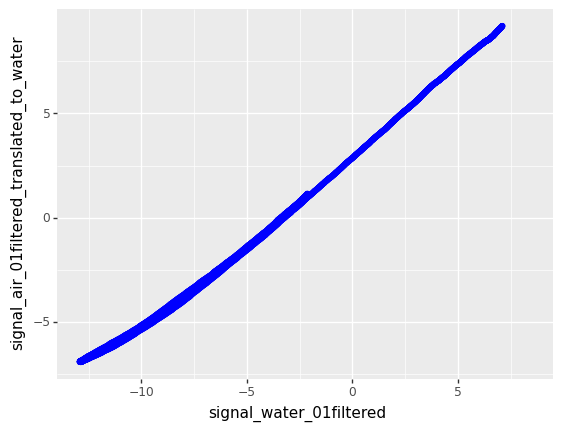

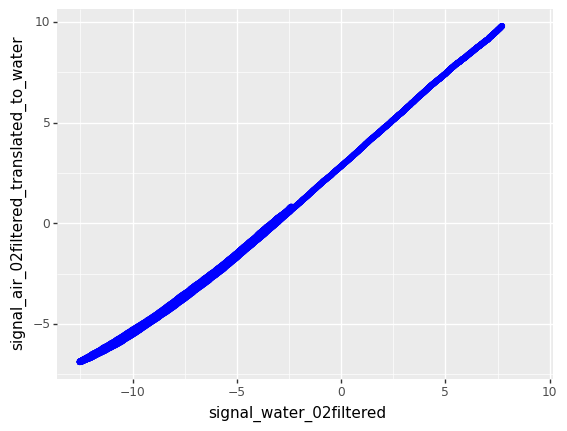

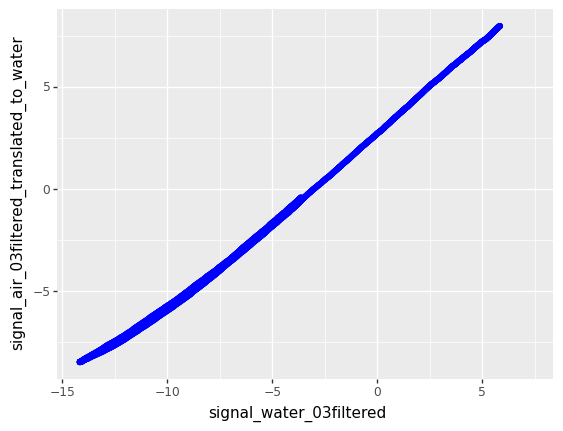

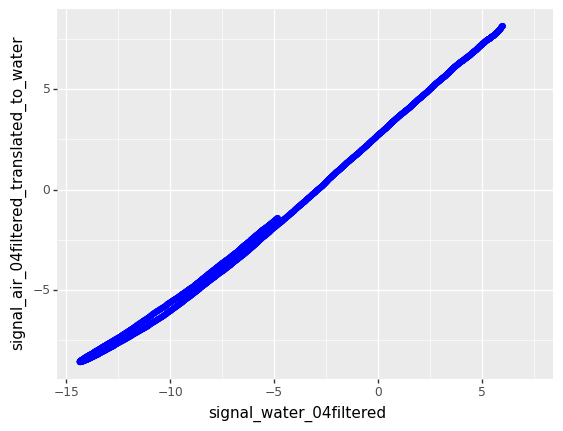

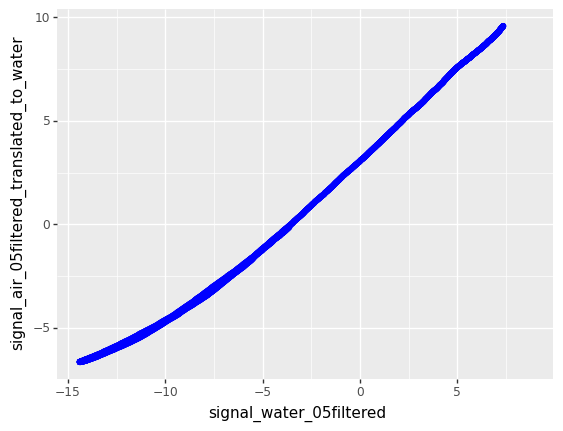

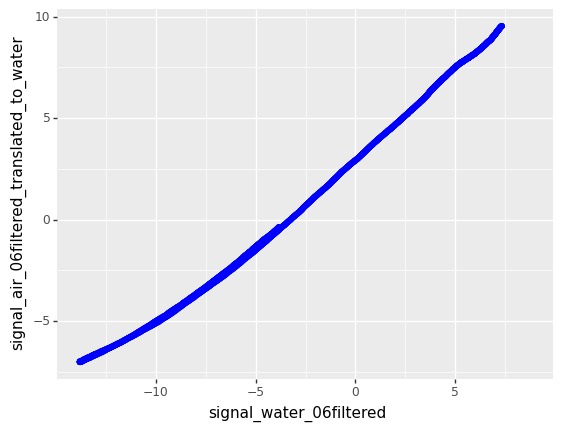

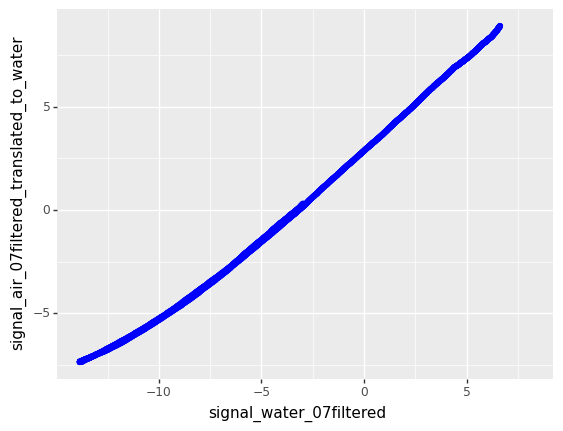

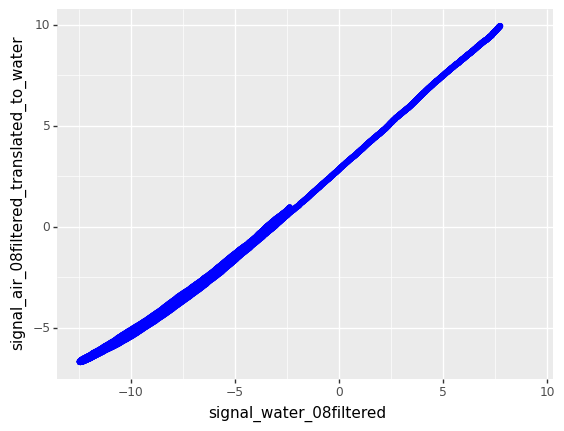

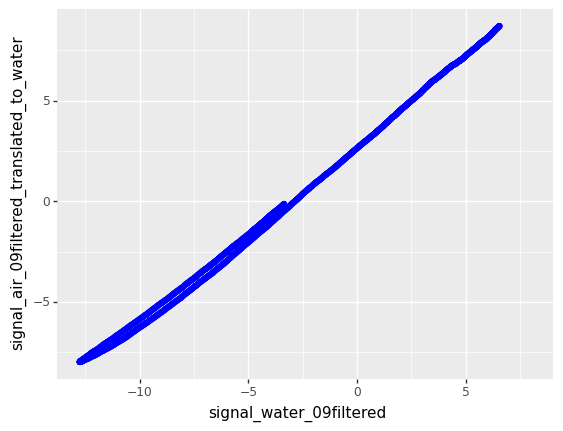

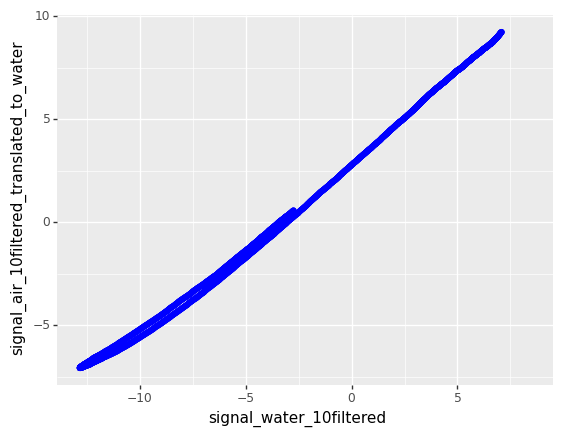

In [ ]:
frame = pd.read_csv('collected_filtered_translated_data.csv',sep=',')
print(frame.columns)

for sensor in sensornums:
  plot= plt.ggplot(frame) +\
  plt.geom_point(plt.aes(x='signal_water_'+sensor+'filtered',y='signal_air_'+sensor+'filtered_translated_to_water'),color='blue')
  plt.geom_point(plt.aes(x='signal_izopropanol_'+sensor+'filtered',y='signal_air_'+sensor+'filtered_translated_to_izopropanol'),color='blue')
  plot.draw()

In [ ]:
def get_mean_difference(frame,signals_a,signals_b):
  diffs = []

  for signal_a,signal_b in zip(signals_a,signals_b):
    original = np.array(frame[signal_a])
    translated = np.array(frame[signal_b])
    difference = original-translated
    diffs.append(difference)
  diffs = np.array(diffs)

  
  meandiff = np.average(diffs,axis=0)

  return meandiff

water_signals = ['signal_water_01filtered', 'signal_water_02filtered','signal_water_03filtered','signal_water_04filtered','signal_water_05filtered','signal_water_06filtered','signal_water_07filtered','signal_water_08filtered','signal_water_09filtered','signal_water_10filtered']
izopropanol_signals = ['signal_izopropanol_01filtered', 'signal_izopropanol_02filtered','signal_izopropanol_03filtered','signal_izopropanol_04filtered','signal_izopropanol_05filtered','signal_izopropanol_06filtered','signal_izopropanol_07filtered','signal_izopropanol_08filtered','signal_izopropanol_09filtered','signal_izopropanol_10filtered']
translated_to_water = ['signal_air_01filtered_translated_to_water','signal_air_02filtered_translated_to_water','signal_air_03filtered_translated_to_water','signal_air_04filtered_translated_to_water','signal_air_05filtered_translated_to_water','signal_air_06filtered_translated_to_water','signal_air_07filtered_translated_to_water','signal_air_08filtered_translated_to_water','signal_air_09filtered_translated_to_water','signal_air_10filtered_translated_to_water']
translated_to_izopropanol = ['signal_air_01filtered_translated_to_izopropanol','signal_air_02filtered_translated_to_izopropanol','signal_air_03filtered_translated_to_izopropanol','signal_air_04filtered_translated_to_izopropanol','signal_air_05filtered_translated_to_izopropanol','signal_air_06filtered_translated_to_izopropanol','signal_air_07filtered_translated_to_izopropanol','signal_air_08filtered_translated_to_izopropanol','signal_air_09filtered_translated_to_izopropanol','signal_air_10filtered_translated_to_izopropanol']
mean_water_difference = get_mean_difference(frame,water_signals,translated_to_water)
mean_izopropanol_difference = get_mean_difference(frame,izopropanol_signals,translated_to_izopropanol)








In [ ]:
def translate_by_vector(data,signals,translation):
  def subtract(series,vector):
    original = np.array(series)
    result = original+vector
    return result

  for signal in signals:
    data[signal+'_moved'] = subtract(data[signal],translation)

  return data

frame2 = translate_by_vector(frame,translated_to_water,mean_water_difference)
frame2 = translate_by_vector(frame2,translated_to_izopropanol,mean_izopropanol_difference)
frame2.to_csv('finalset.csv',sep=',',index=False)



Index(['wavelength', 'signal_air_01', 'signal_izopropanol_01',
       'signal_water_01', 'signal_air_02', 'signal_izopropanol_02',
       'signal_water_02', 'signal_air_03', 'signal_izopropanol_03',
       'signal_water_03',
       ...
       'signal_air_01filtered_translated_to_izopropanol_moved',
       'signal_air_02filtered_translated_to_izopropanol_moved',
       'signal_air_03filtered_translated_to_izopropanol_moved',
       'signal_air_04filtered_translated_to_izopropanol_moved',
       'signal_air_05filtered_translated_to_izopropanol_moved',
       'signal_air_06filtered_translated_to_izopropanol_moved',
       'signal_air_07filtered_translated_to_izopropanol_moved',
       'signal_air_08filtered_translated_to_izopropanol_moved',
       'signal_air_09filtered_translated_to_izopropanol_moved',
       'signal_air_10filtered_translated_to_izopropanol_moved'],
      dtype='object', length=101)


/usr/local/lib/python3.8/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 540 rows containing missing values.
/usr/local/lib/python3.8/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 516 rows containing missing values.
/usr/local/lib/python3.8/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 540 rows containing missing values.
/usr/local/lib/python3.8/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 516 rows containing missing values.
/usr/local/lib/python3.8/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 540 rows containing missing values.
/usr/local/lib/python3.8/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 516 rows containing missing values.
/usr/local/lib/python3.8/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 540 rows containing missing values.

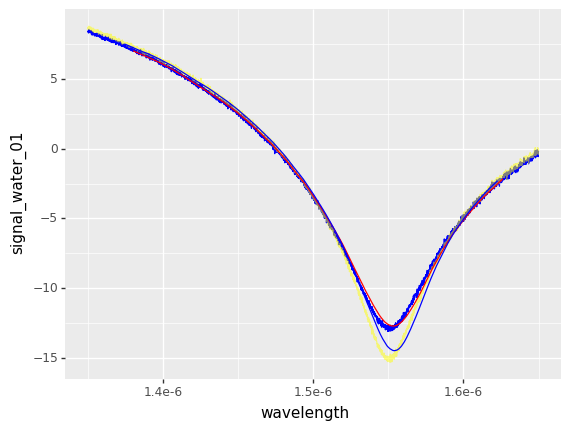

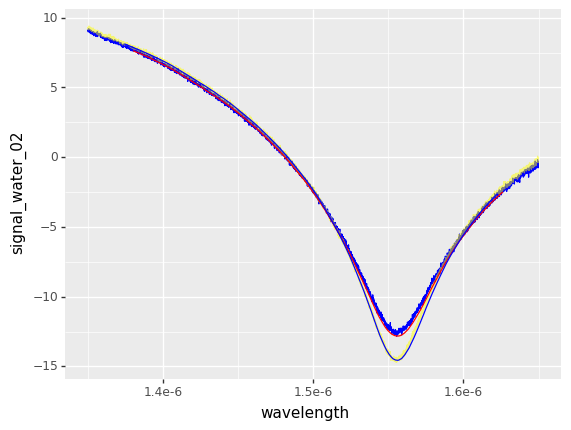

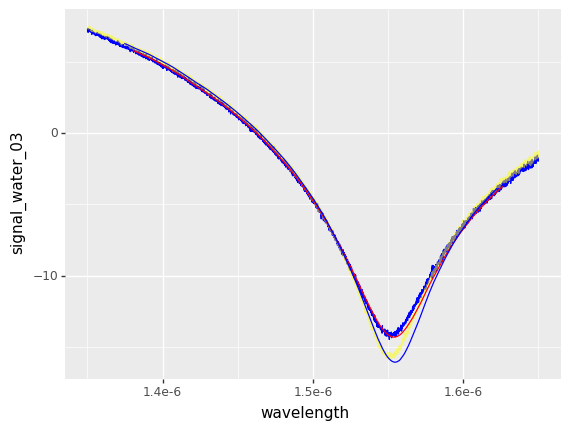

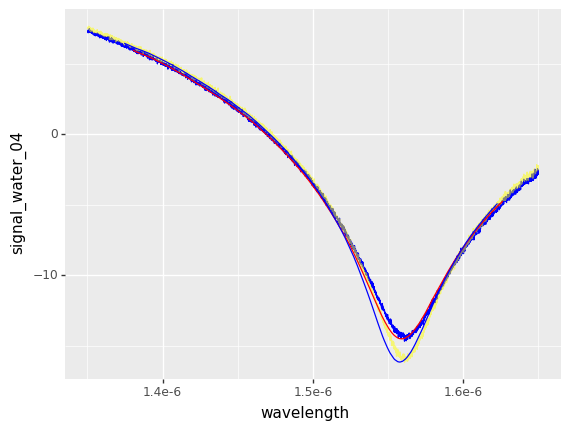

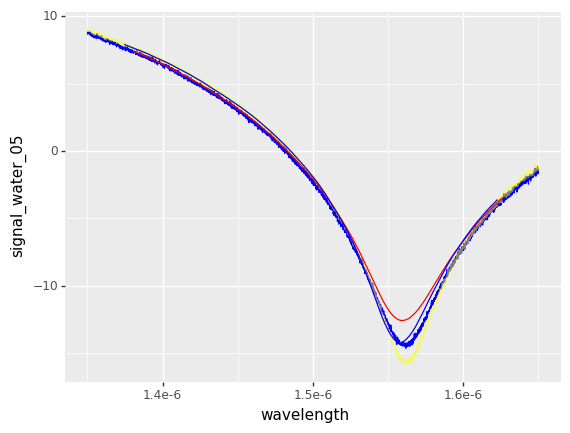

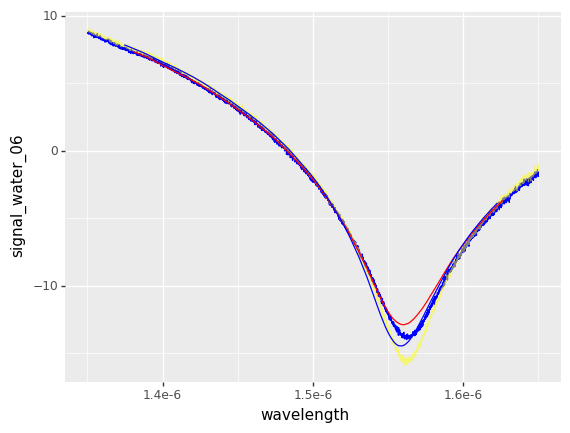

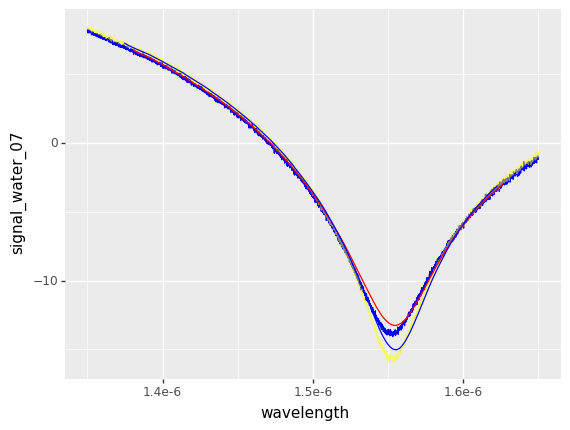

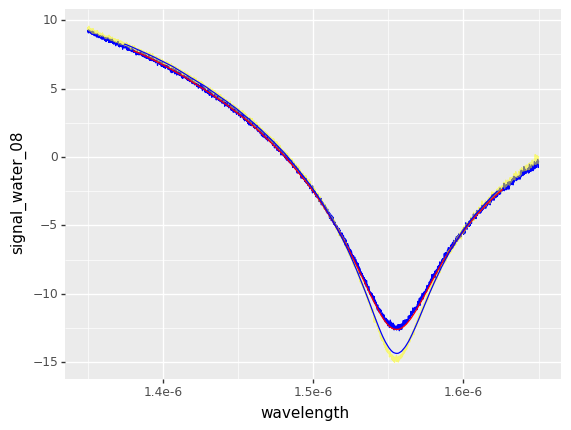

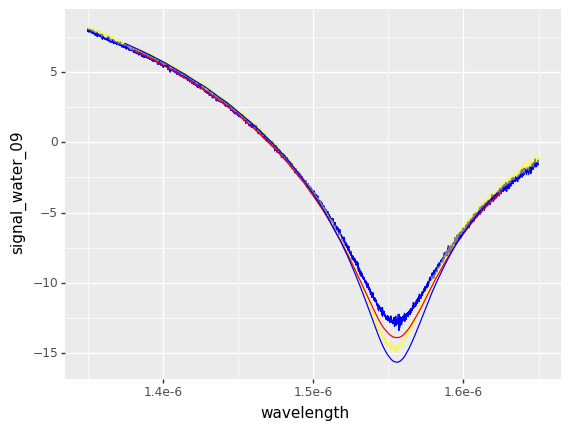

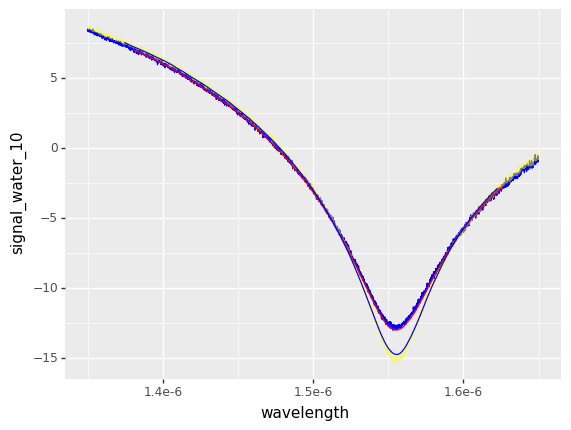

In [ ]:
frame3 = pd.read_csv('finalset.csv',sep=',')
print(frame3.columns)


for sensor in sensornums:
  plot= plt.ggplot(frame) +\
  plt.geom_line(plt.aes(x='wavelength',y='signal_water_'+sensor),color = 'blue')+\
  plt.geom_line(plt.aes(x='wavelength',y='signal_izopropanol_'+sensor),color='yellow',alpha=0.5)+\
  plt.geom_line(plt.aes(x='wavelength',y='signal_air_'+sensor+'filtered_translated_to_water_moved'),color='red')+\
  plt.geom_line(plt.aes(x='wavelength',y='signal_air_'+sensor+'filtered_translated_to_izopropanol_moved'),color='blue')
  plot.draw()